# Adaping TensorFlow Esitmator tutorial for Kaggle Customer Churn 
### Source: https://www.tensorflow.org/tutorials/estimator/linear
### Source: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
!pip install -q sklearn

In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from IPython.display import clear_output
from sklearn.metrics import roc_curve

import seaborn as sns
sns_colors = sns.color_palette('colorblind')

In [3]:
# Load dataset.
csv_file = 'Telco-Customer-Churn-Cleaned.csv'
df = pd.read_csv(csv_file)

# Split Dataset for training

In [4]:
# Splitting the dataset into training and evaluation data
dftrain, dfeval = train_test_split(df, test_size=0.2)
print(len(dftrain), 'train examples')
print(len(dfeval), 'validation examples')

y_train = dftrain.pop('Churn')
y_eval = dfeval.pop('Churn')

5634 train examples
1409 validation examples


# Data Exploration

In [5]:
dftrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5220,Female,0,0,0,29,1,0,DSL,1,0,1,1,0,0,One year,0,Credit card (automatic),58.00,1734.50
5466,Male,0,0,1,10,1,0,No,0,0,0,0,0,0,One year,1,Bank transfer (automatic),19.95,219.50
4127,Male,0,0,1,56,1,1,No,0,0,0,0,0,0,Two year,1,Mailed check,24.80,1424.20
6378,Male,0,1,1,13,1,0,Fiber optic,1,0,0,0,0,1,Month-to-month,0,Electronic check,84.05,1095.30
1652,Male,0,1,0,17,0,0,DSL,1,0,1,0,0,0,Month-to-month,0,Mailed check,34.40,592.75


In [6]:
dftrain.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.160277,0.479411,0.298012,32.388711,0.902911,0.424920,0.290380,0.343273,0.342031,0.293930,0.384274,0.389776,0.591232,64.877307,2292.255405
std,0.366895,0.499620,0.457425,24.540176,0.296105,0.494375,0.453978,0.474844,0.474432,0.455601,0.486466,0.487743,0.491650,30.048106,2275.369279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,398.725000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1398.975000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.900000,3847.287500
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


## Gender breakdown

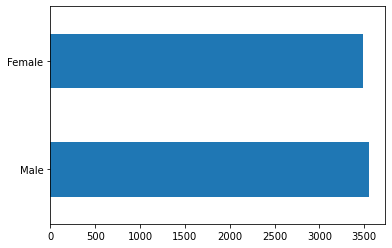

In [7]:
df['gender'].value_counts().plot(kind='barh')
plt.show()

Text(0.5, 0, '% Churn')

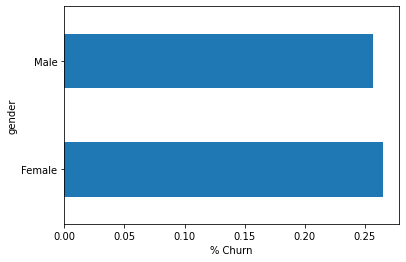

In [8]:
pd.concat([dftrain, y_train], axis=1).groupby('gender').Churn.mean().plot(kind='barh').set_xlabel('% Churn')

### Males and females have an equal chance of churning. This is clearly not a predictive feature for the model. 

## Contract Type Breakdown

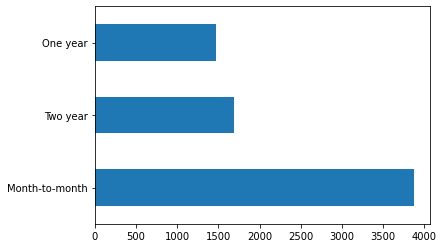

In [9]:
df['Contract'].value_counts().plot(kind='barh')
plt.show()

Text(0.5, 0, '% Churn')

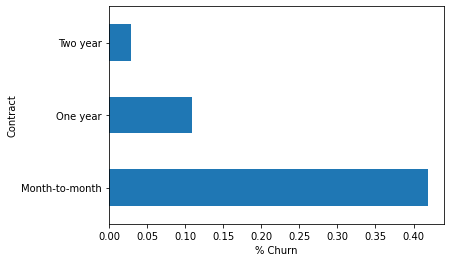

In [10]:
pd.concat([dftrain, y_train], axis=1).groupby('Contract').Churn.mean().plot(kind='barh').set_xlabel('% Churn')

### Approximately half of customers are on a month-to-month contract. This is a stong predictor of churn. 
### Actionable insight: promote one/two year contracts

## Internet Service Breakdown

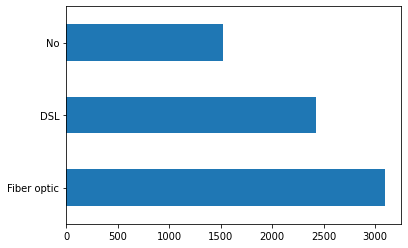

In [11]:
df['InternetService'].value_counts().plot(kind='barh')
plt.show()

Text(0.5, 0, '% Churn')

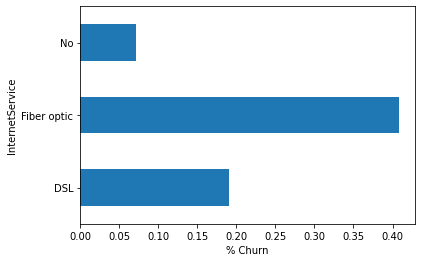

In [12]:
pd.concat([dftrain, y_train], axis=1).groupby('InternetService').Churn.mean().plot(kind='barh').set_xlabel('% Churn')

### Most customers are being provided with an Internet Service (Fiber optic / DSL)
### Customers using fiber optic broadband a much higher chance of churning. This is a predictive feature. 
### Actionable insight: Evidence to suggest customer dissatisfication with this service.

## Tenure

<AxesSubplot:>

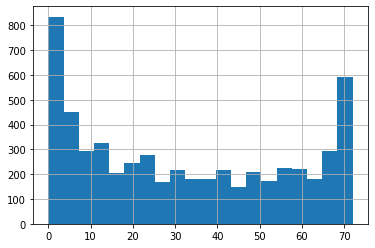

In [13]:
dftrain.tenure.hist(bins=20)

### Most individuals have been customers for 1-5 years. There are peaks of new customers (tenure = 0) and long term customers (tenure >= 70 months). 

Text(0.5, 0, '% Churn')

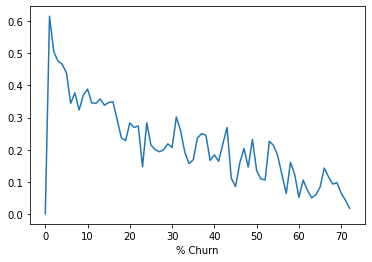

In [14]:
pd.concat([dftrain, y_train], axis=1).groupby('tenure').Churn.mean().plot(kind='line').set_xlabel('% Churn')

### The longer an individual has been a customer the less likely they are to churn.
### Actionable insight: churn prevention measures should be focused on new customers.

# Build the linear regression model
## Start with a simpler model to establish a benchmark.

# Create input functions
### Use normalisation on numeric features

In [15]:
def get_normalization_parameters(df, features):
    """Get the normalization parameters (E.g., mean, std) for traindf for 
    features. We will use these parameters for training, eval, and serving."""

    def _z_score_params(column):
        mean = df[column].mean()
        std = df[column].std()
        return {'mean': mean, 'std': std}

    normalization_parameters = {}
    for column in features:
        normalization_parameters[column] = _z_score_params(column)
    return normalization_parameters

def _numeric_column_normalized(column_name, normalizer_fn):
    return tf.feature_column.numeric_column(column_name, normalizer_fn=normalizer_fn)

def make_zscaler(mean, std):
    def zscaler(col):
        return (col - mean)/std
    return zscaler

# Define your feature columns
def create_feature_cols(features, use_normalization):
    """Create feature columns using tf.feature_column. 
    
    This function will get executed during training, evaluation, and serving."""
    def normalize_column(col):  # Use mean, std defined below.
        return (col - mean)/std
    normalized_feature_columns = []
    for column_name in features:
        normalizer_fn = None
        if use_normalization:
            column_params = normalization_parameters[column_name]
            mean = column_params['mean']
            std = column_params['std']
            normalizer_fn = make_zscaler(mean, std)
        normalized_feature_columns.append(_numeric_column_normalized(column_name,
                                                                     normalizer_fn))
    return normalized_feature_columns

### source: https://towardsdatascience.com/how-to-normalize-features-in-tensorflow-5b7b0e3a4177

In [16]:
def get_normalization_parameters(df, features):
    """Get the normalization parameters (E.g., mean, std) for traindf for 
    features. We will use these parameters for training, eval, and serving."""

    def _z_score_params(column):
        mean = df[column].mean()
        std = df[column].std()
        return {'mean': mean, 'std': std}

    normalization_parameters = {}
    for column in features:
        normalization_parameters[column] = _z_score_params(column)
    return normalization_parameters

def _numeric_column_normalized(column_name, normalizer_fn):
    return tf.feature_column.numeric_column(column_name, normalizer_fn=normalizer_fn)

def make_zscaler(mean, std):
    def zscaler(col):
        return (col - mean)/std
    return zscaler

# Define your feature columns
def create_feature_cols(features, use_normalization):
    """Create feature columns using tf.feature_column. 
    
    This function will get executed during training, evaluation, and serving."""
    def normalize_column(col):  # Use mean, std defined below.
        return (col - mean)/std
    normalized_feature_columns = []
    for column_name in features:
        normalizer_fn = None
        if use_normalization:
            column_params = normalization_parameters[column_name]
            mean = column_params['mean']
            std = column_params['std']
            normalizer_fn = make_zscaler(mean, std)
        normalized_feature_columns.append(_numeric_column_normalized(column_name,
                                                                     normalizer_fn))
    return normalized_feature_columns

In [17]:
dftrain.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [18]:
# Defining feature columns
CATEGORICAL_COLUMNS = [ 'gender','InternetService','Contract', 'PaymentMethod']
NUMERIC_COLUMNS = ['tenure','MonthlyCharges', 'TotalCharges']

BINARY_COLUMNS = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling']

normalization_parameters = get_normalization_parameters(df, NUMERIC_COLUMNS)
feature_columns = create_feature_cols(NUMERIC_COLUMNS, use_normalization=True)

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    
for feature_name in BINARY_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float64))

In [19]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

# Train and evaluate the linear regression model

In [20]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(pd.Series(result))

accuracy                   0.792051
accuracy_baseline          0.717530
auc                        0.852429
auc_precision_recall       0.679905
average_loss               0.419724
label/mean                 0.282470
loss                       0.414616
precision                  0.665615
prediction/mean            0.262676
recall                     0.530151
global_step             1770.000000
dtype: float64


## This model has an accuracy of 79%

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpkcyxap5x/model.ckpt-1770
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

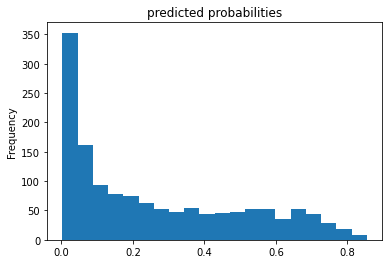

In [21]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

## Most customers in the eval dataset are predicted to not churn
## The AUC score is also high at 85%

(0.0, 1.05)

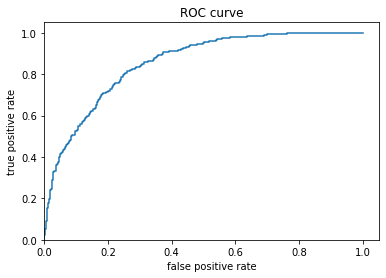

In [22]:
fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)


### The ROC curve indicates a good tradeoff between the true positive rate and false positive rate.

# Build the decision tree model
### This dataset is a binary classification model with multiple features. The BoostedTrees algorithm in the TensorFlow api is a good candidate solution

In [23]:
# Since data fits into memory, use entire dataset per layer. It will be faster.
# Above one batch is defined as the entire dataset.
n_batches = 1
est = tf.estimator.BoostedTreesClassifier(feature_columns,n_batches_per_layer=n_batches)

# The model will stop training once the specified number of trees is built, not
# based on the number of steps.
est.train(train_input_fn)

# Eval.
result = est.evaluate(eval_input_fn)
clear_output()
print(pd.Series(result))

accuracy                4.996451e-01
accuracy_baseline       7.175301e-01
auc                     4.868034e-01
auc_precision_recall    4.409118e-01
average_loss            1.033305e+10
label/mean              2.824698e-01
loss                    1.011061e+10
precision               2.712370e-01
prediction/mean         4.762243e-01
recall                  4.572864e-01
global_step             6.000000e+02
dtype: float64


## This model only has an accuracy of 50%, which is approximately a coin flip

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp74fjs774/model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


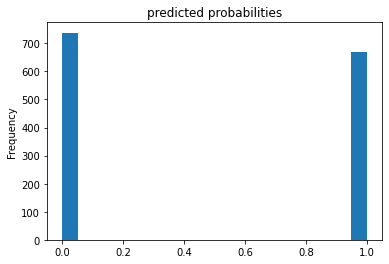

In [24]:
pred_dicts = list(est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')
plt.show()


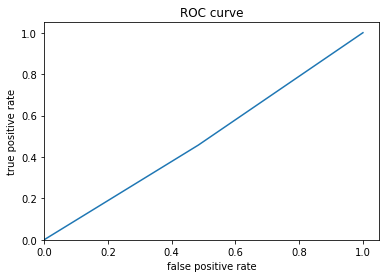

In [25]:
fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)
plt.show()


## The BoostedTree algorithm performed much worse than the Linear Regression.

# Use feature selection to improve the model's accuracy
## In the feature selection notebook it was determined that the features tenure, InternetService, Contract, and MonthlyCharges are important  
### Retrain the model using only these features 

In [26]:
# Defining feature columns
CATEGORICAL_COLUMNS = [ 'InternetService','Contract']
NUMERIC_COLUMNS = ['tenure','MonthlyCharges']

normalization_parameters = get_normalization_parameters(df, NUMERIC_COLUMNS)
feature_columns = create_feature_cols(NUMERIC_COLUMNS, use_normalization=True)

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

### Revised Linear Regression Model
### Accuracy is similar at 78%, but the model is more generalised and less likely to suffer from overfitting

In [27]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(pd.Series(result))

accuracy                   0.784244
accuracy_baseline          0.717530
auc                        0.845193
auc_precision_recall       0.662326
average_loss               0.430734
label/mean                 0.282470
loss                       0.423578
precision                  0.663194
prediction/mean            0.255804
recall                     0.479899
global_step             1770.000000
dtype: float64


### Revised BoostedTree model
### Accuracy is improved to 68% with dimension reduction 

In [28]:
# Since data fits into memory, use entire dataset per layer. It will be faster.
# Above one batch is defined as the entire dataset.
n_batches = 1
est = tf.estimator.BoostedTreesClassifier(feature_columns,n_batches_per_layer=n_batches)

# The model will stop training once the specified number of trees is built, not
# based on the number of steps.
est.train(train_input_fn)

# Eval.
result = est.evaluate(eval_input_fn)
clear_output()
print(pd.Series(result))

accuracy                6.884315e-01
accuracy_baseline       7.175301e-01
auc                     6.579659e-01
auc_precision_recall    5.820296e-01
average_loss            3.456145e+10
label/mean              2.824698e-01
loss                    3.381742e+10
precision               4.597250e-01
prediction/mean         3.612491e-01
recall                  5.879397e-01
global_step             6.000000e+02
dtype: float64


## Further improve accuracy (to 77%) by increasing the number of trees created and/or by varying the maximum allowed depth of the decision trees

In [30]:
params = {
  'n_trees': 10, # Default value = 2 
  'max_depth': 4,  # Default value = 6 
  'n_batches_per_layer': 1,
  # You must enable center_bias = True to get DFCs. This will force the model to
  # make an initial prediction before using any features (e.g. use the mean of
  # the training labels for regression or log odds for classification when
  # using cross entropy loss).
  'center_bias': True
}

est = tf.estimator.BoostedTreesClassifier(feature_columns, **params)
# Train model.
est.train(train_input_fn, max_steps=100)

# Evaluation.
results = est.evaluate(eval_input_fn)
clear_output()
pd.Series(results).to_frame()

,0
accuracy,0.773598
accuracy_baseline,0.717530
auc,0.822515
auc_precision_recall,0.645850
average_loss,0.448615
label/mean,0.282470
loss,0.446851
precision,0.627832
prediction/mean,0.298439
recall,0.487437


# Insights
## The linear regression and (tuned) boosted tree algorithm had similar accuracy in predicting churn.

# Improvements
## 1. Combine addtional service features to calculate the number of subscriptions per customer.
## 2. Tune the decision tree further for higher accuracy.
## 3. Try other ML algorithms.¶
